# Lecture 06 (EDA Part 1: Hands-On Analysis of Tuberculosis Data) 

### DATA 2201, Fall 2025

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
# This option stops scientific notation for pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# Silence some spurious seaborn warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Exploratory Data Analysis (EDA)
“EDA is an attitude, a state of flexibility, a willingness to look for those things that we believe are not there, as well as those that we believe to be there.”  – John Tukey

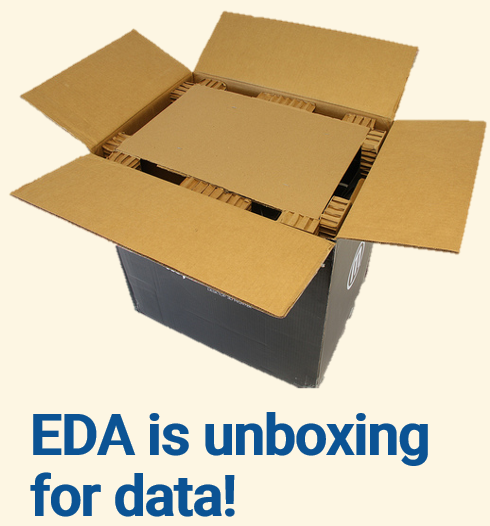

## Key Data Properties to Consider in EDA

- Structure -- the “shape” of a data file

- Granularity -- how fine/coarse is each datum

- Scope -- how (in)complete is the data

- Temporality -- how is the data situated in time

- Faithfulness -- how well does the data capture “reality”


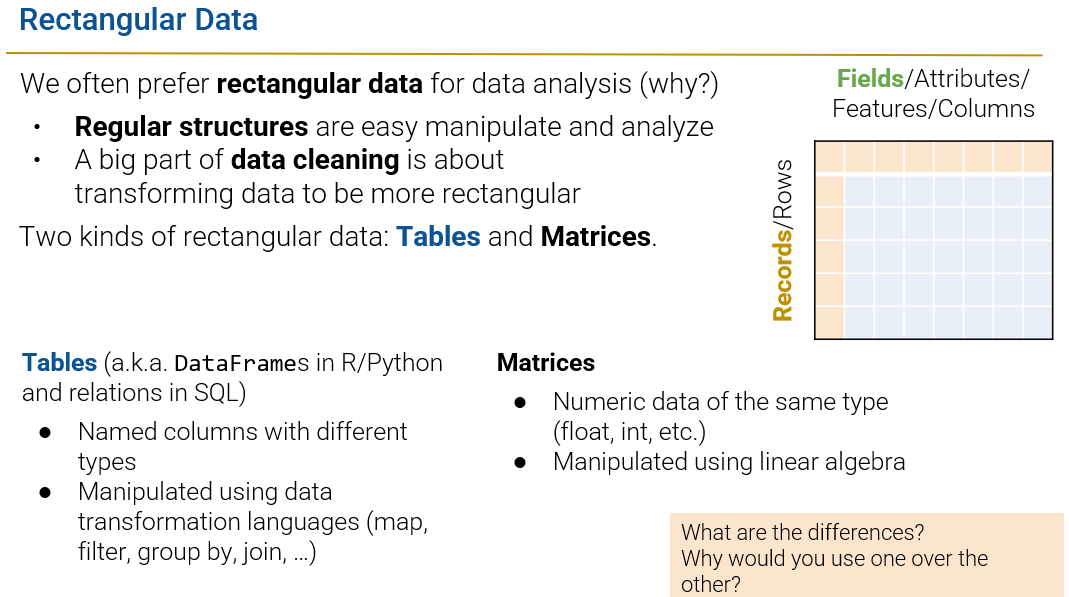

# EDA Examples using Tuberculosis Data in the United States

What can we say about the presence of Tuberculosis in the United States?

Let's look at the data included in the [original CDC article](https://www.cdc.gov/mmwr/volumes/71/wr/mm7112a1.htm?s_cid=mm7112a1_w#T1_down) published in 2021.

You could download the data directly from the web using Pandas:

In [ ]:
# !pip install lxml
# tbls = pd.read_html("https://www.cdc.gov/mmwr/volumes/71/wr/mm7112a1.htm?s_cid=mm7112a1_w#T1_down")
# df = tbls[0] # First table on the website
# df

However, it is good practice to make a snapshot of the data for your analysis so we will work from a local copy.

<br>

---

# CSV and Nice Field Names
Someone, already downloaded table 1 and saved it as a CSV file located in `data/cdc_tuberculosis.csv`.

We can then explore the CSV (which is a text file, and does not contain binary-encoded data) in many ways:
1. Using a the jupyter lab explorer tool look at the data
2. Opening the CSV directly in DataHub (read-only), Excel, Google Sheets, etc.
3. The Python file object
4. pandas, using `pd.read_csv()`

<br>


---

## Play with the data in the Jupyter Lab Explorer
1, 2. Let's start with the first two so we really solidify the idea of a CSV as **rectangular data (i.e., tabular data) stored as comma-separated values**.

<br>

---

## Play with the data in python

3. Next, let's try using the Python file object. Let's check out the first four lines:

In [ ]:
with open("data/cdc_tuberculosis.csv", "r") as f:
    for i, row in enumerate(f):
        print(row)
        if i >= 3: break

Whoa, why are there blank lines interspaced between the lines of the CSV?

You may recall that all line breaks in text files are encoded as the special newline character `\n`. Python's `print()` prints each string (including the newline), and an additional newline on top of that.

If you're curious, we can use the `repr()` function to return the raw string with all special characters:

In [ ]:
with open("data/cdc_tuberculosis.csv", "r") as f:
    for i, row in enumerate(f):
        print(repr(row)) # print raw strings
        if i >= 3: break

## A brief tangent on reading files (optional)

Here is a shorter way to read the first few lines. It has a problem ...

In [ ]:
with open("data/cdc_tuberculosis.csv", "r") as f:
    for row in f.readlines()[:4]:
        print(repr(row)) # print raw strings    

The main drawback here is that we read the entire file when we only want the first few lines. That can be wasteful. The Python `zip` built-in function ([docs here](https://docs.python.org/3/library/functions.html#zip)) is a useful thing to know about. This code may look a little odd at first, but it does the same as the first example above but much more concisely, and once you get used to thinking about `zip`, it becomes a very natural tool to express various iteration strategies:

In [ ]:
with open("data/cdc_tuberculosis.csv", "r") as f:
    for _, row in zip(range(4), f):
        print(repr(row)) # print raw strings

As data gets bigger it will be important to read only the parts you need into the notebook.

<br/>

---

4. Finally, let's see the tried-and-true Data Science approach: **`pandas`**.

In [ ]:
tb_df = pd.read_csv("data/cdc_tuberculosis.csv",)
tb_df

**Wait, what's up with the "Unnamed" column names? And the first row, for that matter?**

Congratulations -- you're ready to wrangle your data. Because of how things are stored, we'll need to clean the data a bit to name our columns better.

A reasonable first step is to identify the row with the right header. The `pd.read_csv()` function ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)) has the convenient `header` parameter.

You could also try:
1. Shift+Tab while your cursor is in the function call parenthesis.
1. `Cmd+i` or `Ctrl+i` to get contextual help. 

In [ ]:
tb_df = pd.read_csv("data/cdc_tuberculosis.csv", header=1) # row index
tb_df

<br><br>
Wait...but now we can't differentiate betwen the "Number of TB cases" and "TB incidence" year columns. pandas has tried to make our lives easier by automatically adding ".1" to the latter columns, but this doesn't help us as humans understand the data.

We can do this manually with `df.rename()` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html?highlight=rename#pandas.DataFrame.rename)):

In [ ]:
rename_dict = {'2019': 'TB cases 2019',
               '2020': 'TB cases 2020',
               '2021': 'TB cases 2021',
               '2019.1': 'TB incidence 2019',
               '2020.1': 'TB incidence 2020',
               '2021.1': 'TB incidence 2021'}
tb_df = tb_df.rename(columns=rename_dict)
tb_df

<br/><br/>

---

# Record Granularity

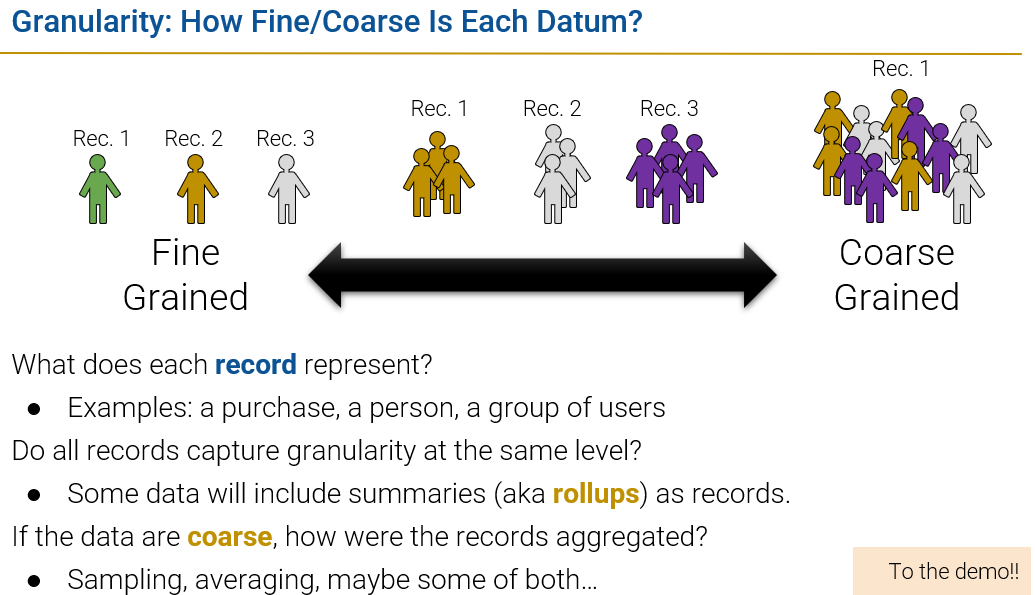

You might already be wondering: What's up with that first record?

Row 0 is what we call a **rollup record**, or summary record. It's often useful when displaying tables to humans. The **granularity** of record 0 (Totals) vs the rest of the records (States) is different.

In [ ]:
tb_df.head()

<br/>

Okay, EDA step two. How was the rollup record aggregated?

Let's check if Total TB cases is the sum of all state TB cases. We can drop it and try to sum up all the remaining rows. 

In [ ]:
...


<details>
<summary>Click to show solution</summary>

<pre>

tb_df.drop(0)

</pre>
</details>



In [ ]:
...


<details>
<summary>Click to show solution</summary>

<pre>

tb_df.drop(0).sum()

</pre>
</details>



<br/>

Whoa, what's going on? Check out the column types:

In [ ]:
tb_df.dtypes

<br/>

*What's happening?*  
**Look at the row for "California" above.**  

Looks like those commas are causing all TB cases to be read as the `object` datatype, or **storage type** (close to the Python string datatype), so pandas is concatenating strings instead of adding integers.

<br/>

Fortunately `read_csv` also has a `thousands` parameter (for what it's worth, I didn't know this beforehand--I [googled](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) this):

In [ ]:
# improve readability: chaining method calls with outer parentheses/line breaks
tb_df = (
    pd.read_csv("data/cdc_tuberculosis.csv", header=1, thousands=',')
    .rename(columns=rename_dict)
)
tb_df

In [ ]:
...


<details>
<summary>Click to show solution</summary>

<pre>

tb_df.drop(0).sum()

</pre>
</details>



In [ ]:
tb_df.head(1)

The Total TB cases look right. Phew!

(We'll leave it to your own EDA to figure out how the TB incidence "Totals" were aggregated...you may want to check out the bonus section first, though.)

In order to compute incidence we are going to need more data: **population information**!!

<br/><br/>

---

# Gather Census Data

U.S. Census population estimates [source](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html) (2019), [source](https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html) (2020-2021).

Running the below cells cleans the data. We encourage you to closely explore the CSV and study these lines after lecture...

There are a few new methods here:
* `df.convert_dtypes()` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.convert_dtypes.html)) conveniently converts all float dtypes into ints and is out of scope for the class.
* `df.drop_na()` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)) will be explained in more detail next time.

In [ ]:
census_2010s_df = pd.read_csv("data/nst-est2019-01.csv", header=3, thousands=",")
census_2010s_df

Do some basic data cleaning

In [ ]:
census_2010s_df = (
    ...
)
census_2010s_df


<details>
<summary>Click to show solution</summary>

<pre>

census_2010s_df = (
    census_2010s_df
    .rename(columns={"Unnamed: 0": "Geographic Area"})
    .drop(columns=["Census", "Estimates Base"])
    .convert_dtypes() # "smart" converting of columns to int, use at your own risk
    .dropna()  # we'll introduce this very soon
)
census_2010s_df

</pre>
</details>



What is the granularity of each row in this table.

Notice there is a `'.'` at the beginning of all the states.  We need to remove that.

In [ ]:
census_2010s_df['Geographic Area'] = census_2010s_df['Geographic Area'].str.strip('.')
census_2010s_df

## Loading the 2020s data
The 2020s data is in a separate file so we will repeate the same data cleaning process.

In [ ]:
# census 2020s data
census_2020s_df = pd.read_csv("data/NST-EST2022-POP.csv", header=3, thousands=",")
census_2020s_df = (
    census_2020s_df
    .drop(columns=["Unnamed: 1"])
    .rename(columns={"Unnamed: 0": "Geographic Area"})
    .convert_dtypes()                 
    .dropna()                         
)
census_2020s_df['Geographic Area'] = census_2020s_df['Geographic Area'].str.strip('.')
census_2020s_df

## Joining (merging) Multiple Files

#### Use Primary and Foreign Keys for joining Multiple files

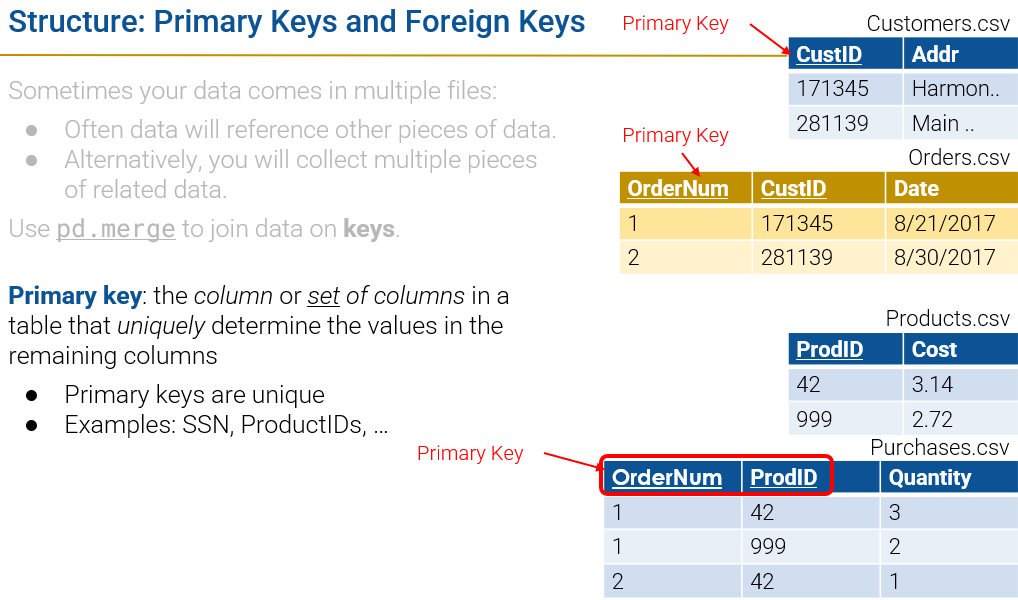

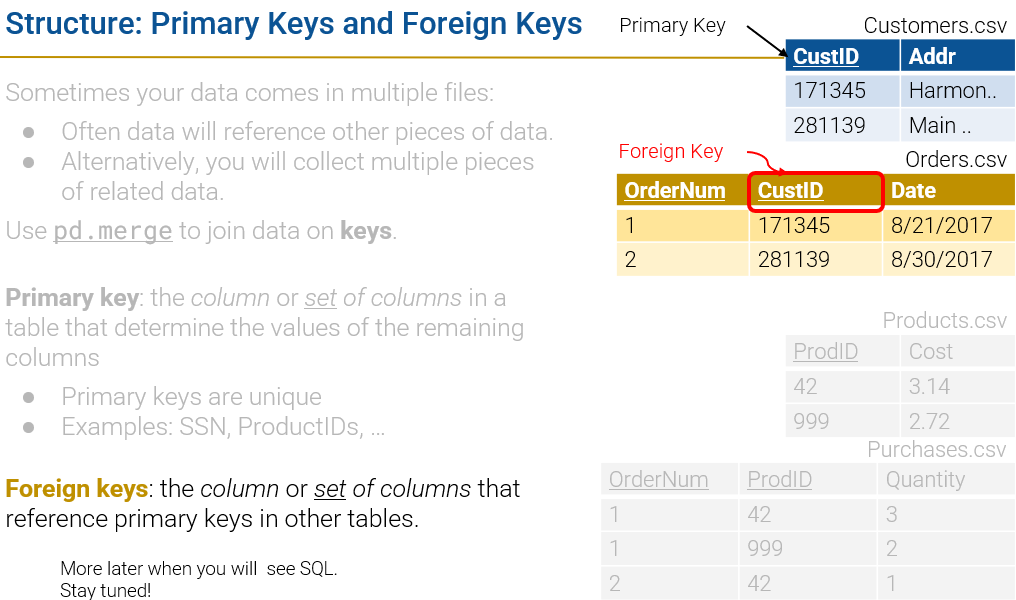

# Join Data (Merge DataFrames)
### Example: We need to combine the census data with the tuberculosis data.
Time to `merge`! Here I use the DataFrame method `df1.merge(right=df2, ...)` on DataFrame `df1` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)). Contrast this with the function `pd.merge(left=df1, right=df2, ...)` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.merge.html?highlight=pandas%20merge#pandas.merge)). Feel free to use either.

In [ ]:
# Show the three tables that we are going to join
display(tb_df.tail(2))
display(census_2010s_df.tail(2))
display(census_2020s_df.tail(2))

In [ ]:
# merge TB dataframe with two US census dataframes
tb_census_df = (
    tb_df
    .merge(right=census_2010s_df,
           left_on="U.S. jurisdiction", right_on="Geographic Area")
    .merge(right=census_2020s_df,
           left_on="U.S. jurisdiction", right_on="Geographic Area")
)
tb_census_df.tail()

This is a little unwieldy. **We could either drop the unneeded columns now, or just merge on smaller census DataFrames**. Let's do the latter.

In [ ]:
# try merging again, but cleaner this time
tb_census_df = (
    
)
tb_census_df.tail()


<details>
<summary>Click to show solution</summary>

<pre>

tb_census_df = (
    tb_df
    .merge(right=census_2010s_df[["Geographic Area", "2019"]],
           left_on="U.S. jurisdiction", right_on="Geographic Area")
    .drop(columns="Geographic Area")
    .merge(right=census_2020s_df[["Geographic Area", "2020", "2021"]],
           left_on="U.S. jurisdiction", right_on="Geographic Area")
    .drop(columns="Geographic Area")
)
tb_census_df.tail()

</pre>
</details>


## Reproduce incidence

**Let's recompute incidence to make sure we know where the original CDC numbers came from.**

From the [CDC report](https://www.cdc.gov/mmwr/volumes/71/wr/mm7112a1.htm?s_cid=mm7112a1_w#T1_down): TB incidence is computed as “Cases per 100,000 persons using mid-year population estimates from the U.S. Census Bureau.”

If we define a group as 100,000 people, then we can compute the TB incidence for a given state population as

$$\text{TB incidence} = \frac{\text{\# TB cases in population}}{\text{\# groups in population}} = \frac{\text{\# TB cases in population}}{\text{population}/100000} $$

$$= \frac{\text{\# TB cases in population}}{\text{population}} \times 100000$$

Let's try this for 2019:

In [ ]:
tb_census_df["recompute incidence 2019"] = (
   ...
)
tb_census_df


<details>
<summary>Click to show solution</summary>

<pre>

 tb_census_df["TB cases 2019"]/tb_census_df["2019"] * 100_000

</pre>
</details>


Awesome!!!

Let's use a for-loop and Python format strings to compute TB incidence for all years. Python f-strings are just used for the purposes of this demo, but they're handy to know when you explore data beyond this course ([Python documentation](https://docs.python.org/3/tutorial/inputoutput.html)).

In [ ]:
# recompute incidence for all years
for year in [2019, 2020, 2021]:
    ...
    )
tb_census_df


<details>
<summary>Click to show solution</summary>

<pre>

tb_census_df[f"recompute incidence {year}"] = (
        tb_census_df[f"TB cases {year}"]/tb_census_df[f"{year}"]*100_000
    )

</pre>
</details>



These numbers look pretty close!!! There are a few errors in the hundredths place, particularly in 2021. It may be useful to further explore reasons behind this discrepancy. We'll leave it to you!

In [ ]:
tb_census_df.describe()


<br><br><br>

---

# Bonus EDA

### Try this part on your own or with a partner to reinforce the concepts.

We likely won't get to this part, so a tutorial is provided for your own curiosity.

**How do we reproduce that reported statistic in the original [CDC report](https://www.cdc.gov/mmwr/volumes/71/wr/mm7112a1.htm?s_cid=mm7112a1_w)?**

> Reported TB incidence (cases per 100,000 persons) increased **9.4%**, from **2.2** during 2020 to **2.4** during 2021 but was lower than incidence during 2019 (2.7). Increases occurred among both U.S.-born and non–U.S.-born persons.

This is TB incidence computed across the entire U.S. population! How do we reproduce this
* We need to reproduce the "Total" TB incidences in our rolled record.
* But our current `tb_census_df` only has 51 entries (50 states plus Washington, D.C.). There is no rolled record.
* What happened...?

Let's get exploring!
<br/><br/>

Before we keep exploring, I'm going to set all indexes to more meaningful values, instead of just numbers that pertained to some row at some point. This will make our cleaning slightly easier.

In [ ]:
tb_df = tb_df.set_index("U.S. jurisdiction")
tb_df

In [ ]:
census_2010s_df = census_2010s_df.set_index("Geographic Area")
census_2010s_df

In [ ]:
census_2020s_df = census_2020s_df.set_index("Geographic Area")
census_2020s_df

It turns out that our merge above only kept state records, even though our original `tb_df` had the "Total" rolled record:

In [ ]:
tb_df.head()

Recall that merge by default does an **inner** merge by default, meaning that it only preserves keys that are present in **both** DataFrames.

The rolled records in our census dataframes have different `Geographic Area` fields, which was the key we merged on:

In [ ]:
census_2010s_df

The Census DataFrame has several rolled records. The aggregate record we are looking for actually has the Geographic Area named "United States".

One straightforward way to get the right merge is to rename the value itself. Because we now have the Geographic Area index, we'll use `df.rename()` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)):

In [ ]:
# rename rolled record for 2010s
census_2010s_df.rename(index={'United States':'Total'}, inplace=True)
census_2010s_df

In [ ]:
# same, but for 2020s rename rolled record
census_2020s_df.rename(index={'United States':'Total'}, inplace=True)
census_2020s_df

<br/>

Next let's rerun our merge. Note the different chaining, because we are now merging on indexes (`df.merge()` [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)).

In [ ]:
tb_census_df = (
    tb_df
    .merge(right=census_2010s_df[["2019"]],
           left_index=True, right_index=True)
    .merge(right=census_2020s_df[["2020", "2021"]],
           left_index=True, right_index=True)
)
tb_census_df

<br/>

Finally, let's recompute our incidences:

In [ ]:
# recompute incidence for all years
for year in [2019, 2020, 2021]:
    tb_census_df[f"recompute incidence {year}"] = tb_census_df[f"TB cases {year}"]/tb_census_df[f"{year}"]*100000
tb_census_df

We reproduced the total U.S. incidences correctly!

We're almost there. Let's revisit the quote:

> Reported TB incidence (cases per 100,000 persons) increased **9.4%**, from **2.2** during 2020 to **2.4** during 2021 but was lower than incidence during 2019 (2.7). Increases occurred among both U.S.-born and non–U.S.-born persons.

Recall that percent change from $A$ to $B$ is computed as
$$\text{percent change} = \frac{B - A}{A} \times 100$$.

In [ ]:
tb_census_df

In [ ]:
incidence_2020 = tb_census_df.loc['Total', 'recompute incidence 2020']
incidence_2020

In [ ]:
incidence_2021 = tb_census_df.loc['Total', 'recompute incidence 2021']
incidence_2021


In [ ]:
difference = (incidence_2021 - incidence_2020)/incidence_2020 * 100
difference

**We did it!!!** 